### Google Stock Price Prediction using RNN - LSTM

- Data Preprocessing
- Building the RNN
- Making the prediction and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [4]:
data = data['Close'].values

# Reshape the data to a 2D array for scaling
data = data.reshape(-1, 1)

# Normalize the stock prices to range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [6]:
# Define the number of days to use for prediction (look-back window)
look_back = 60

# Prepare the data
X = []
y = []

for i in range(look_back, len(scaled_data)):
  X.append(scaled_data[i - look_back:i, 0]) # Use the last 60 days of data
  y.append(scaled_data[i, 0]) # The price on the current day (t)

# Convert the data into numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to be 3D: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [7]:
# Build the RNN model using LSTM
model = Sequential()

# Add an LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.fit(X, y, epochs=5, batch_size=32)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0379
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1198e-04
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.2640e-04
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.4003e-04
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0753e-04


In [9]:
# Predict stock prices on the test data (the last 60 days)
predicted_stock_price = model.predict(X)

# Inverse transform to get the actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


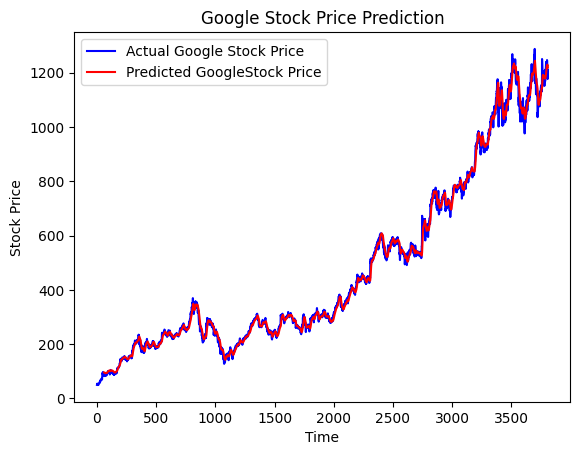

In [11]:
# Plot the results
plt.plot(data, color='blue', label='Actual Google Stock Price')
plt.plot(np.arange(look_back, len(data)), predicted_stock_price, color='red', label='Predicted GoogleStock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [12]:
#Evaluate the model
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y, predicted_stock_price)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 338591.24133193085
